In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# colore settings:
sns.set(rc={'axes.facecolor':"#EAEDED",
            "figure.facecolor":"#AED6F1",
            "grid.color":"#E0D3AF",
            "axes.edgecolor":"#424949",
            "axes.labelcolor":"#424949",
            "text.color":"#424949" # color for headlines and sub headlines
           }) 

In [3]:
df_train = pd.read_csv('https://github.com/PabloJRW/DATASETS/raw/main/Titanic/train.csv')
df_test = pd.read_csv('https://github.com/PabloJRW/DATASETS/raw/main/Titanic/test.csv')

# <b>EXPLORING DATA

In [4]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# <b>EDA (Análisis Exploratorio de Datos) 

## <b>"Survived" - Variable Objetivo 


In [7]:
train = df_train.copy()
test = df_test.copy()

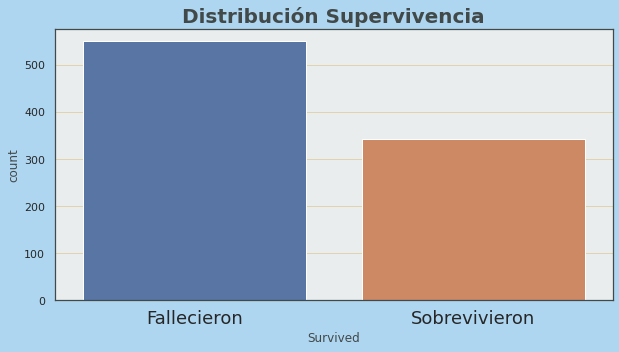

In [8]:
# Distribución de la variable objetivo
fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Distribución Supervivencia', fontweight='bold', fontsize=20)
sns.countplot(x=train['Survived'], ax=ax)
ax.set_xticklabels(('Fallecieron', 'Sobrevivieron'), fontsize=18)
plt.show()

In [9]:
# Cuál fue el porcentaje de sobrevivientes?
print(f"Porcentaje de supervivientes: {round(len(df_train[df_train['Survived']==1]) / len(df_train) * 100, 1) }%")

Porcentaje de supervivientes: 38.4%


<b>📝 Note:</b> El 38.4% de los pasajeros que viajaron abordo del Titanic sobrevivieron, en contraparte, falleció el 61.6%.

In [10]:
# Valores de las variables categoricas
for col in df_train.columns:
     if (df_train[col].nunique() < 10):
        print(f"{col}: {df_train[col].unique()}")

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q' nan]


<ul>
  <li>Pclass : Clase en la que viajaron los pasajeros (1 = 1st, 2 = 2nd, 3 = 3rd)  </li>
  <li>SibSp : # de herman@s / espos@s abordo.  </li>
  <li>Parch : # de padres / hijos abordo.</li>
  <li>Embarked : Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)</li>
</ul> 
<hr>    


## <b>Datos Faltantes

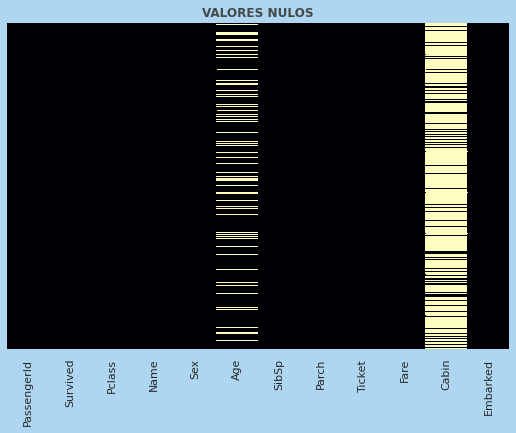

In [11]:
# Visualización de variables con valores faltantes
plt.figure(figsize=(9,6))
plt.title('VALORES NULOS', fontweight='bold')
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='magma')
plt.show()

In [12]:
nulls = train.isnull().sum()
nulls[nulls>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<b>📝 Note:</b>Tenemos 3 variables que contienen datos nulos o datos faltantes. Age, Cabin y Embarked.

## <b>"Title" (Título)

In [13]:
# Creando la variable 'Title' extraida de 'Name'
train['Title'] = train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
test['Title'] = test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
print('Los '+ str(train['Title'].nunique())+' títulos de los pasajeros abordo son:')
titles=[]
for t in train['Title'].unique():
    titles.append(t)
    
print(titles)

Los 17 títulos de los pasajeros abordo son:
['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer']


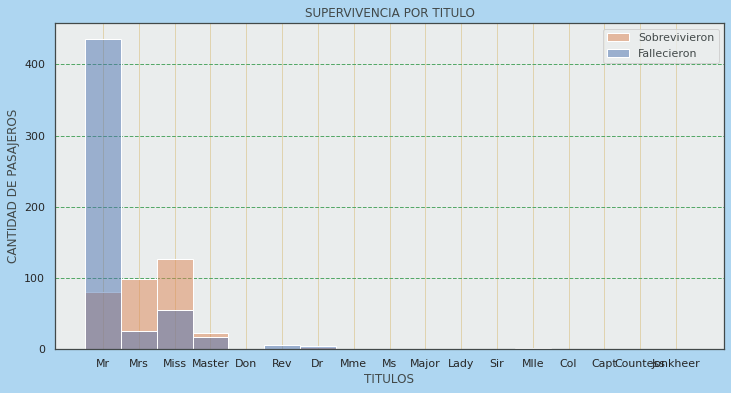

In [14]:
plt.figure(figsize=(12,6))
plt.title('SUPERVIVENCIA POR TITULO')
sns.histplot(x='Title', hue='Survived', data=train)
plt.grid(axis='y', linewidth=1, color='g', linestyle="--")
plt.ylabel('CANTIDAD DE PASAJEROS'), plt.xlabel('TITULOS')
plt.legend(['Sobrevivieron', 'Fallecieron'])
plt.show()

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> Hay algunas nomenclaturas de los titulos que son la misma etiqueta social por lo que procedo a categorizarlos.
</div>

In [15]:
# Contenedores para Title
Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "Countess":   "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
}

# Uniendo titulos en contenedores 
train['title_bin'] = train['Title'].map(Title_Dictionary)
test['title_bin'] = train['Title'].map(Title_Dictionary)

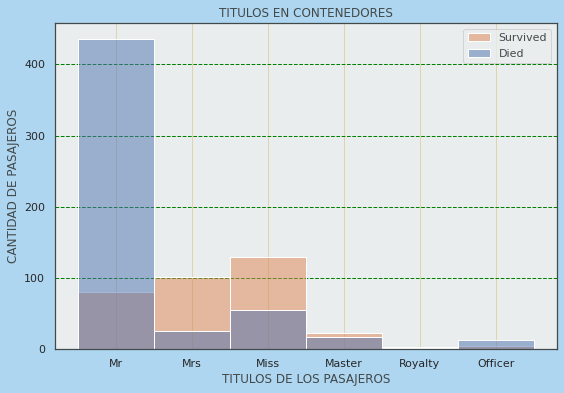

In [16]:
plt.figure(figsize=(9,6))
plt.title('TITULOS EN CONTENEDORES')
sns.histplot(x=train.title_bin, hue=train.Survived)
plt.xlabel('TITULOS DE LOS PASAJEROS')
plt.yticks(), plt.ylabel('CANTIDAD DE PASAJEROS')
plt.legend(['Survived', 'Died'])
plt.grid(axis='y', color = 'green', linestyle = '--', linewidth = 1.)
plt.show()

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> Los títulos podrían ser un buen indicador de supervivencia. 
</div>

## <b>"Pclass" (Clase)



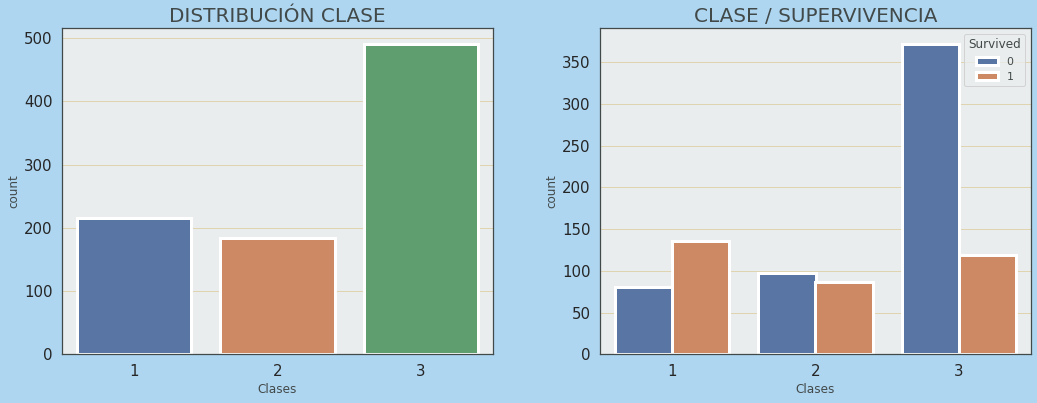

In [86]:
# Visualización de distribución de clases
# build figure
fig = plt.figure(figsize=(27,6))

# add grid to figure
gs = fig.add_gridspec(1,3)

# fill grid with subplots
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

# adjust subheadline fontsize
ax0.set_title("DISTRIBUCIÓN CLASE", fontsize=20)
ax1.set_title("CLASE / SUPERVIVENCIA", fontsize=20)

# adjust lable fontsize
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)

# plot data into subplots 
sns.countplot(x="Pclass",data=train, ax=ax0, linewidth = 3).set(xlabel="Clases")
sns.countplot(x="Pclass",data=train, ax=ax1, linewidth = 3, hue="Survived").set(xlabel="Clases")
fig.subplots_adjust(wspace=0.25)
plt.show()

<b>📝 Note:</b> La mayoría de los pasajeros abordo viajaron en tercera clase, seguido por los de primera clase y segunda clase.



<b>📝 Note:</b> La primera clase fue la única que registró una razón de sobrevivientes mayor que los fallecidos, sin embargo, es notable la gran proporción de fallecidos que viajaron en tercera clase. Esta parece ser una variable de peso para inferir si un pasajero abordo sebrevivió o no.  


In [34]:
train['Pclass'].where(train['Survived']==1).value_counts()

1.0    136
3.0    119
2.0     87
Name: Pclass, dtype: int64

## <b>"Fare" (Tarifa)

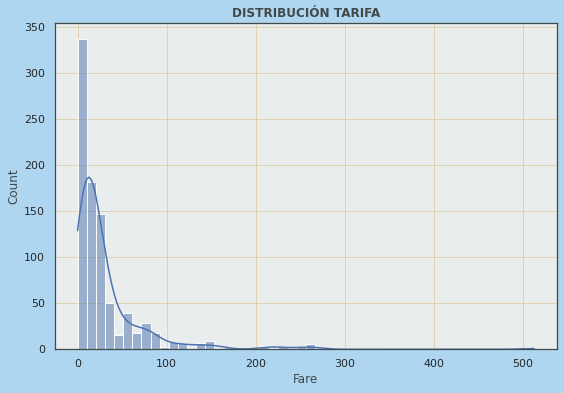

In [35]:
plt.figure(figsize=(9,6))
plt.title("DISTRIBUCIÓN TARIFA", fontweight='bold')
sns.histplot(train['Fare'], bins=50, kde=True)
plt.show()

<b>📝 Note:</b>

### <b>Tarifa por clase

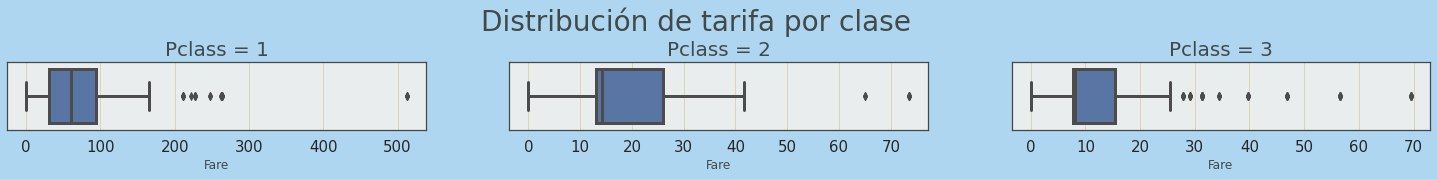

In [91]:
# build figure
fig = plt.figure(figsize=(25.5,2))

gs = fig.add_gridspec(1,3)

# fill grid with subplots
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

# adjust subheadline fontsize
ax0.set_title('Pclass = 1', fontsize=20)
ax1.set_title('Pclass = 2', fontsize=20)
ax2.set_title('Pclass = 3', fontsize=20)

# adjust lable fontsize
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

# plot data into subplots 
sns.boxplot(x="Fare",data=train[train['Pclass']==1], orient="h", ax=ax0, linewidth = 3, hue="Survived").set(xlabel="Fare")
sns.boxplot(x="Fare",data=train[train['Pclass']==2], orient="h", ax=ax1, linewidth = 3, hue="Survived").set(xlabel="Fare")
sns.boxplot(x="Fare",data=train[train['Pclass']==3], orient="h", ax=ax2, linewidth = 3, hue="Survived").set(xlabel="Fare")

# add headline
fig.subplots_adjust(top=0.6)
fig.suptitle('Distribución de tarifa por clase', fontsize="28");

<b>📝 Note:</b>La distribución de tarifas para los pasajeros en primera clase es mayor que en segunda y tercera clase, por lo que, queda claro que estos pagaron un tarifa más alta por viajar en primera clase, sin embargo, podemos ver que pasajeros en primera clase pagaron poco o nada.

## <b>"Sex" (Sexo)

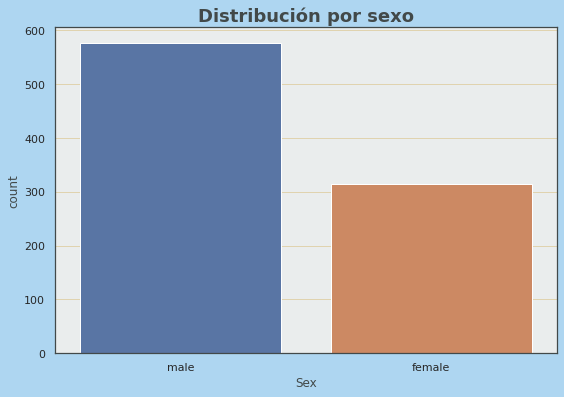

In [37]:
plt.figure(figsize=(9,6))
plt.title('Distribución por sexo', fontweight='bold', fontsize=18)
sns.countplot(x=train['Sex'])
plt.show()

In [38]:
# Cantidad de pasajeros por sexo
pxs = train['Sex'].value_counts() # pasajeros por sexo
ppxs = ((pxs / len(train)) * 100).round(2) # porcentaje pasajeros por sexo
print("El conjunto de datos de entrenamiento cuenta con "+str(len(train))+" instancias (pasajeros), de los cuales:")
print(str(pxs[0])+" es decir, el "+str(ppxs[0])+ " eran mujeres.")
print(str(pxs[1])+" es decir, el "+str(ppxs[1])+ " eran hombres.")

El conjunto de datos de entrenamiento cuenta con 891 instancias (pasajeros), de los cuales:
577 es decir, el 64.76 eran mujeres.
314 es decir, el 35.24 eran hombres.


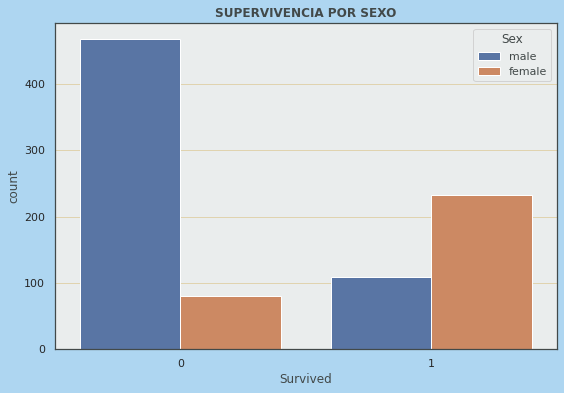

In [39]:
# Visualización de supervivencia por sexo
fig = plt.figure(figsize=(9,6))
plt.title('SUPERVIVENCIA POR SEXO', fontweight='bold') 
plt.grid(axis='y')
sns.countplot(x='Survived', hue='Sex', data=train).grid(axis='y')
plt.show()


<b>📝 Note:</b> De manera gráfica podemos concluir que un gran porcenaje de pasajeros fallecidos fueron hombres.


In [40]:
# Porcentaje de supervivientes por sexo.
hombres_df = train[train['Sex']=='male']
mujeres_df = train[train['Sex']=='female']

print('El '+ str(round(len(hombres_df[hombres_df['Survived']==1])*100/len(hombres_df))) +'% de los hombres sobrevivió.')
print('El '+ str(round(len(mujeres_df[mujeres_df['Survived']==1])*100/len(mujeres_df))) +'% de los mujeres sobrevivió.')

El 19% de los hombres sobrevivió.
El 74% de los mujeres sobrevivió.



<b>💡 Idea:</b> Hasta el momento, al parecer las mujeres en primera clase tuvieron una alta probabilidad de sobrevivir.

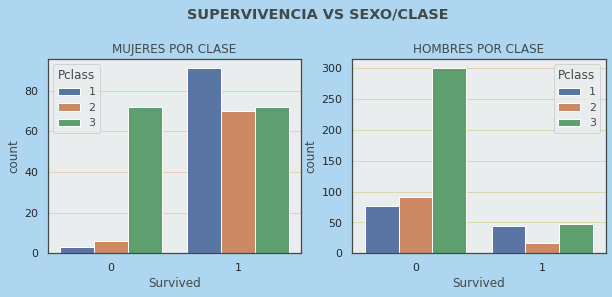

In [41]:
# Supervivencia entre las variables clase y sexo.
fig = plt.figure(figsize=(10,4))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

ax0.set_title('MUJERES POR CLASE')
ax1.set_title('HOMBRES POR CLASE')

plt.suptitle('SUPERVIVENCIA VS SEXO/CLASE', fontweight='bold')
sns.countplot(data=train[train['Sex']=='female'], x='Survived', hue='Pclass', ax=ax0)
sns.countplot(data=train[train['Sex']=='male'], x='Survived', hue='Pclass', ax=ax1)
plt.subplots_adjust(top = 0.8)
plt.show()

In [42]:
# Porcentaje de mujeres supervivientes por clase
mujeres_sup = mujeres_df[mujeres_df['Survived']==1]
for i in [1,2,3]:
  mujeres_sup_por = len(mujeres_sup[mujeres_sup['Pclass']==i]) / len(mujeres_df[mujeres_df['Pclass']==i]) * 100
  print("El "+ str(round(mujeres_sup_por)) +"% de las mujeres en "+str(i)+" clase sobrevivió.")

El 97% de las mujeres en 1 clase sobrevivió.
El 92% de las mujeres en 2 clase sobrevivió.
El 50% de las mujeres en 3 clase sobrevivió.


<b>📝 Note:</b> Efectivamente, las mujeres que viajaron en primera clase tuvieron una alta probabilidad de sobrevivir, pues sobrevivió el 97% de ellas. No muy distinto, el 92% de mujeres en segunda clase sobrevivió. 



## <b>"Age" (Edad)

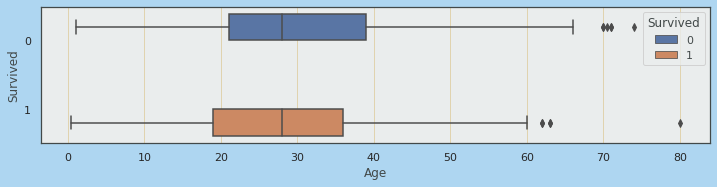

In [43]:
# Hay diferencias significativas en las edades entre los supervivientes y no supervivientes?
plt.figure(figsize=(12,4))
sns.boxplot(x='Age', y='Survived', hue='Survived', orient='h', data=train)
plt.subplots_adjust(top=0.6)
plt.show()

<div style="color:#9A7D0A;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #F9E79F;
           background-color:#FCF3CF;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>📝 Note:</b> Al parecer las personas de mayor edad murieron en mayor proporción.
</div>

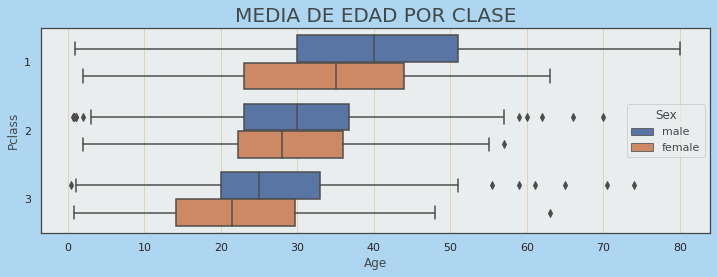

In [44]:
# 
fig = plt.figure(figsize=(12,6))
plt.title('MEDIA DE EDAD POR CLASE', fontsize="20")
sns.boxplot(x='Age', y='Pclass', hue='Sex', orient='h', data=train)
fig.subplots_adjust(top=0.6)
plt.show()

<div style="color:#21618C;
           display:fill;
           padding: 5px;
           border-radius:10px;
           border-style: solid;
           border-color: #AED6F1;
           background-color:#D6EAF8;
           font-size:15px;
           font-family: Didot;
           letter-spacing:0.5px">
<b>💡 Idea:</b> La media de edad por clase podria ser el mejor valor para realizar imputacion de los valores nulos en 'Age'.

## <b>"Sibsp" (Acompañantes)

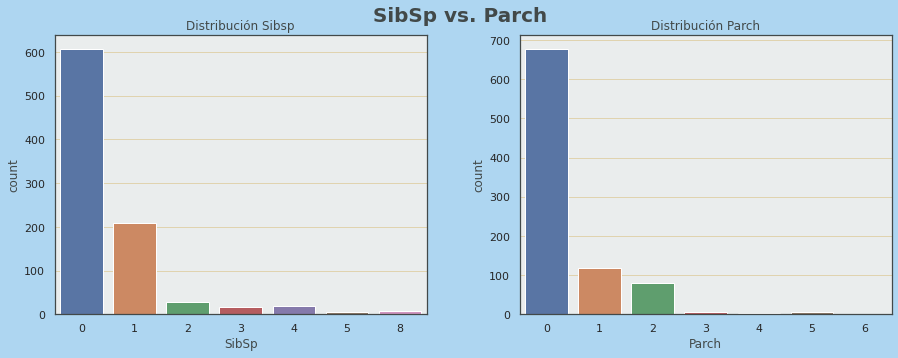

In [45]:
fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

plt.suptitle('SibSp vs. Parch', fontweight='bold', fontsize=20)
plt.subplots_adjust(top=0.9, wspace=.25)
ax0.set_title('Distribución Sibsp')
ax1.set_title('Distribución Parch')

sns.countplot(x='SibSp', data=train, ax=ax0)
sns.countplot(x='Parch', data=train, ax=ax1)
plt.show()

### Acompañados por herman@s y espos@s

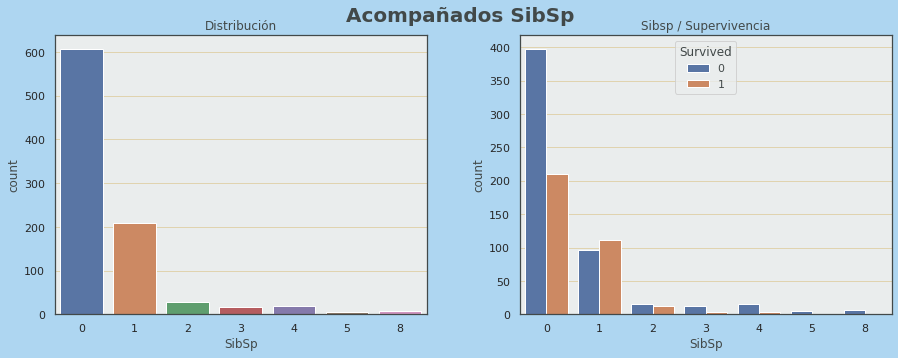

In [46]:
# Distribucion de pasajeros acompañados(Herman@s-Espos@)
fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

plt.suptitle('Acompañados SibSp', fontweight='bold', fontsize=20)
plt.subplots_adjust(top=0.9, wspace=.25)
ax0.set_title('Distribución')
ax1.set_title('Sibsp / Supervivencia')

sns.countplot(x='SibSp', data=train, ax=ax0)
sns.countplot(x='SibSp', hue='Survived', data=train, ax=ax1)
plt.show()

In [47]:
super_sibsp =[]
for x in train['SibSp'].unique():
  frecuencia_sibsp = len(train[train['SibSp']==x])
  sup = frecuencia_sibsp - (len(train.loc[(train['SibSp']==x) & (train['Survived']==1)]))
  per_sibsp = round((frecuencia_sibsp / len(train['SibSp']) * 100), 2)
  per_sup_sibsp = round((len(train.loc[(train['SibSp']==x) & (train['Survived']==1)]) / frecuencia_sibsp * 100), 2)
  super_sibsp.append({'# Acompañantes':x, '# Sobrevivientes':sup, '% Acompañantes':per_sibsp, '% Sobrevivientes':per_sup_sibsp})

super_sibsp.sort(key=lambda k: k['% Sobrevivientes'], reverse=True)
super_sibsp = pd.DataFrame(super_sibsp)
for i in range(len(super_sibsp)):
  surv = super_sibsp.loc[i, '# Sobrevivientes']
  cant = super_sibsp.loc[i, '# Acompañantes']
  per_sibsp = super_sibsp.loc[i, '% Acompañantes']
  perc = super_sibsp.loc[i, '% Sobrevivientes']
pd.DataFrame(super_sibsp)

,# Acompañantes,# Sobrevivientes,% Acompañantes,% Sobrevivientes
0,1,97,23.46,53.59
1,2,15,3.14,46.43
2,0,398,68.24,34.54
3,3,12,1.80,25.00
4,4,15,2.02,16.67
5,5,5,0.56,0.00
6,8,7,0.79,0.00


### Acompañados por padres e hij@s

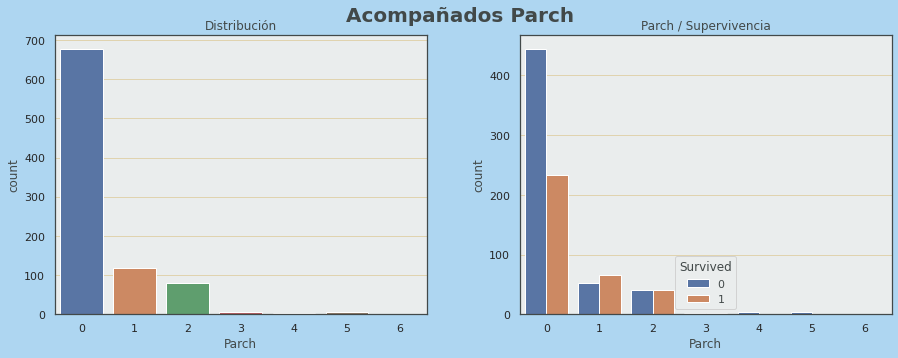

In [48]:
# Distribucion de pasajeros acompañados(Padres-Hijos)
fig = plt.figure(figsize=(15, 5))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

plt.suptitle('Acompañados Parch', fontweight='bold', fontsize=20)
plt.subplots_adjust(top=0.9, wspace=.25)
ax0.set_title('Distribución')
ax1.set_title('Parch / Supervivencia')

sns.countplot(x='Parch', data=train, ax=ax0)
sns.countplot(x='Parch', hue='Survived', data=train, ax=ax1)
plt.show()

In [49]:
super_parch =[]
for x in train['Parch'].unique():
  frecuencia_parch = len(train[train['Parch']==x])
  sup = frecuencia_parch - (len(train.loc[(train['Parch']==x) & (train['Survived']==1)]))
  per_parch = round((frecuencia_parch / len(train['Parch']) * 100), 2)
  per_sup_parch = round((len(train.loc[(train['Parch']==x) & (train['Survived']==1)]) / frecuencia_parch * 100), 2)
  super_parch.append({'cant':x, 'sup':sup, 'porcentaje_sup':per_sup_parch})
  
super_parch.sort(key=lambda k: k['porcentaje_sup'], reverse=True)
super_parch = pd.DataFrame(super_parch)
for i in range(len(super_parch)):
  cant = super_parch.loc[i, 'cant']
  surv = super_parch.loc[i, 'sup']
  perc = super_parch.loc[i, 'porcentaje_sup']
  print(str(surv)+" pasajeros, es decir, el "+str(perc)+"% de los que viajaron acompañados por "+str(cant)+" personas sobrevivieron.")

2 pasajeros, es decir, el 60.0% de los que viajaron acompañados por 3 personas sobrevivieron.
53 pasajeros, es decir, el 55.08% de los que viajaron acompañados por 1 personas sobrevivieron.
40 pasajeros, es decir, el 50.0% de los que viajaron acompañados por 2 personas sobrevivieron.
445 pasajeros, es decir, el 34.37% de los que viajaron acompañados por 0 personas sobrevivieron.
4 pasajeros, es decir, el 20.0% de los que viajaron acompañados por 5 personas sobrevivieron.
4 pasajeros, es decir, el 0.0% de los que viajaron acompañados por 4 personas sobrevivieron.
1 pasajeros, es decir, el 0.0% de los que viajaron acompañados por 6 personas sobrevivieron.


# <b>Correlations<b>

In [50]:
# Correlaciones entre todas las variables numericas contra supervivencia
corr_matrix = train.corr(method='spearman').round(2)
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.00
Fare           0.32
Parch          0.14
SibSp          0.09
PassengerId   -0.01
Age           -0.05
Pclass        -0.34
Name: Survived, dtype: float64

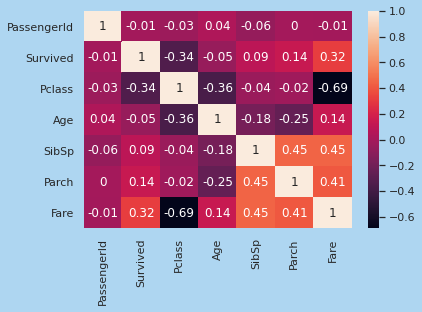

In [51]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

# <b>PREPARE DATA

In [52]:
X_train = train.drop(['PassengerId', 'Survived', 'Ticket', 'Cabin', 'PassengerId', 'Fare', 'Name'], axis='columns')
y_train = train.Survived

In [53]:
num_features = X_train.Age
cat_features = X_train.drop('Age', axis=1).astype('category')

### Preprocesador

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.experimental import enable_iterative_imputer 
from sklearn.linear_model import BayesianRidge
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# numerical transformer pipeline (only contains 'Age')
num_transformer = Pipeline([ 
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()),
                           ])

# categorical transformer pipeline
cat_transformer = Pipeline([ 
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore')),
                            ])

final_pipe = ColumnTransformer([
    ('num_transfomer', num_transformer, num_features),
    ('cat_transformer', cat_transformer, cat_features),
                                ],remainder='passthrough')

X_prepared =final_pipe.fit_transform(X_train)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

### SELECT A MODEL

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


models = {'svc': SVC(), 
          'sgd': SGDClassifier(), 
          'logistic': LogisticRegression(),
          'decision_tree': DecisionTreeClassifier(), 
          'random_forest': RandomForestClassifier(),
          'knn': KNeighborsClassifier()}

n_models = len(models)
scores=[]
for name, model in models.items():
    y_train_pred = cross_val_predict(model, X_prepared, y_train, cv=5)
    precision = np.mean(precision_score(y_train, y_train_pred)).round(2)
    recall = np.mean(recall_score(y_train, y_train_pred)).round(2)
    f1 = np.mean(f1_score(y_train, y_train_pred)).round(2)

    model_scores = np.array([name, precision, recall, f1])
    scores.append(np.array(model_scores))
    
      
scores_df = pd.DataFrame(scores, columns=['Model', 'Precision', 'Recall', 'F1']); scores_df.set_index('Model', inplace=True)
scores_df.sort_values(by='F1', ascending=False)

In [ ]:
from sklearn.metrics import classification_report

logistic_clf = LogisticRegression(random_state=42)
y_pred = cross_val_predict(logistic_clf, X_prepared, y_train)
print(classification_report(y_train, y_pred))

In [ ]:
from sklearn.metrics import precision_recall_curve

logistic_clf = LogisticRegression(random_state=42)
logistic_clf.fit(X_prepared, y_train)
y_scores = cross_val_predict(logistic_clf, X_prepared, y_train, cv=5, method='decision_function', n_jobs=-1)
threshold = 0.5
y_with_thres = (y_scores > threshold)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
#plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds =roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# Puntaje del area bajo la curva
roc_auc_score(y_train, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

# Busqueda de los mejores hiperparametros para el modelo(SVM)
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
param_grid = [{'solver':['newton-cg', 'lbfgs', 'liblinear'], 'penalty':['l1', 'l2'],
              'C':[30, 25, 20, 15, 10, 5, 1.0]}]
              
grid_search = GridSearchCV(logistic_clf, param_grid, cv=kfold, scoring='accuracy')

In [ ]:
grid_search.fit(X_prepared, y_train)
grid_search.best_params_

In [ ]:
final_model = grid_search.best_estimator_
final_model.score(X_prepared, y_train)

In [ ]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [ ]:
test_prepared = final_pipe.transform(test)

In [ ]:
predictions = final_model.predict(test_prepared)
test['Survived'] = predictions

In [ ]:
preds = test[['PassengerId', 'Survived']]
#preds = preds.set_index('PassengerId')
preds.to_csv('submission.csv',index=False)

In [ ]:
preds

In [ ]:
! matplotlib version
